# Car Price Prediction
**Problem Statement:**


A Chinese automobile company Geely Auto aspires to enter the US market by setting up their
manufacturing unit there and producing cars locally to give competition to their US and European
counterparts.
They have contracted an automobile consulting company to understand the factors on which the
pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars
in the American market, since those may be very different from the Chinese market. The company
wants to know:
Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types
of cars across the American market.


**Business Goal:**

We are required to model the price of cars with the available independent variables. It will be used
by the management to understand how exactly the prices vary with the independent variables. They
can accordingly manipulate the design of the cars, the business strategy, etc. to meet certain price
levels. Further, the model will be a good way for management to understand the pricing dynamics of
a new market

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv("CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

There are no null values in the dataset. There are many categorical inputs, meaning we need encoding. Also different types of imputers because certain categorical may be inter-related like cylinder number, whereas others might not.

In [4]:
#dropping out the index column and car names
df.drop(["car_ID", "CarName"],axis = 1,  inplace= True)
df.head()


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


**Exploring the value counts of the Non-numerical value attributes**

In [5]:
# DO NOT RUN THIS CELL
# df["CarName"].value_counts() 
# car names have been dropped

In [6]:
df.columns 

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [7]:
objects = ['fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem']

[print(f"\n printing Value counts of {name}\n", name, df[name].value_counts()) for name in objects]


 printing Value counts of fueltype
 fueltype gas       185
diesel     20
Name: fueltype, dtype: int64

 printing Value counts of aspiration
 aspiration std      168
turbo     37
Name: aspiration, dtype: int64

 printing Value counts of doornumber
 doornumber four    115
two      90
Name: doornumber, dtype: int64

 printing Value counts of carbody
 carbody sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

 printing Value counts of drivewheel
 drivewheel fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

 printing Value counts of enginelocation
 enginelocation front    202
rear       3
Name: enginelocation, dtype: int64

 printing Value counts of enginetype
 enginetype ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

 printing Value counts of cylindernumber
 cylindernumber four      159
six        24
five       11
eight       5
two 

[None, None, None, None, None, None, None, None, None]

Althought the columns "cylindernumber" and "doornumber" are numerical attributes we want to use ordinal or label encoder to these tasks so that the machine learning algorithms recognise the ordinal relationships between the values

**Using ordinal encoder on the "cylindernumber" and "doornumber" categiries**

In [8]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, LabelEncoder

ordinal_encoder = OrdinalEncoder()
one_hot_encoder = OneHotEncoder()
label_encoder = LabelEncoder()
scaler = StandardScaler()
ordinal_columns = ["cylindernumber", "doornumber"]
one_hot_columns = ['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem']

# these will be used for transormation pipelines later. Now let's go on with the numerical attributes 
# since the dataset is small we may need to apply stratified shuffle split on the dataset


Since the data is having many of single values in categorical columns its better to transform the dataset's categorical attributes before splitting the dataset


**Exploring numerical data**

In [9]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


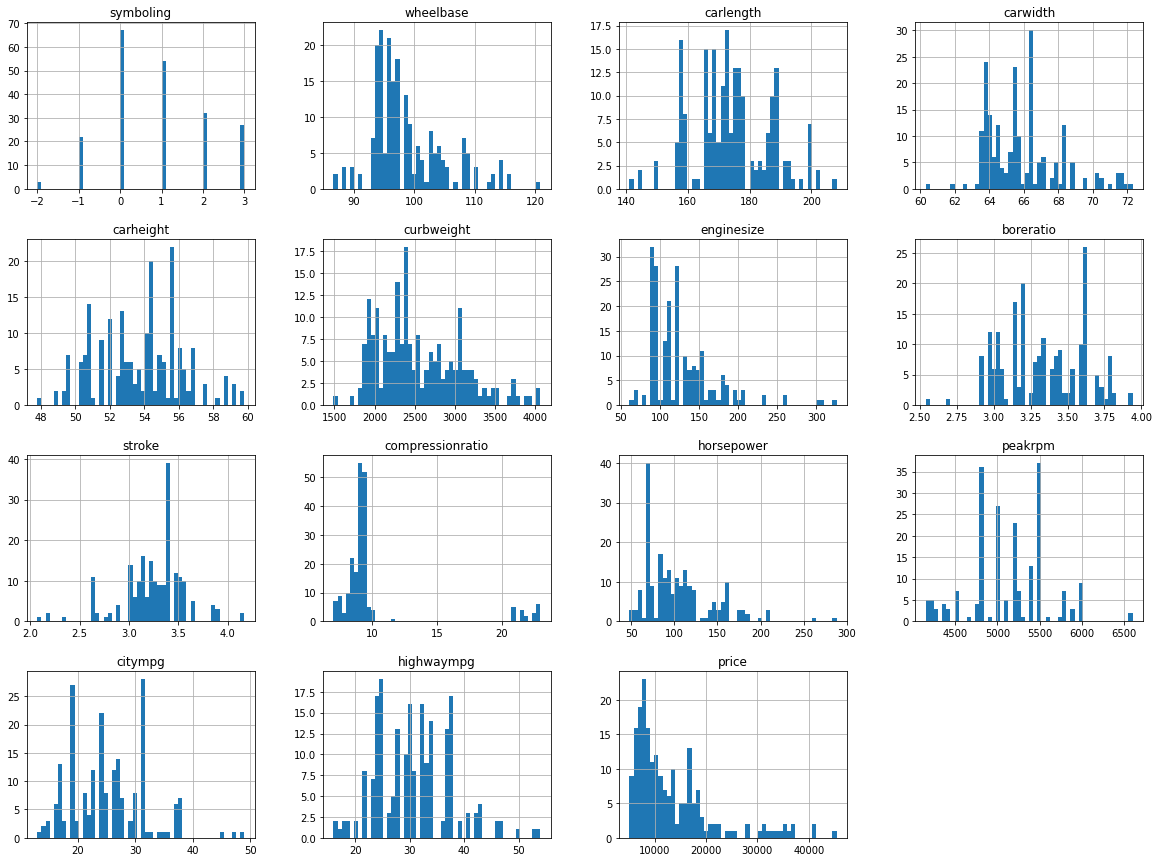

In [10]:
#plotting histograms
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins = 50, figsize= (20, 15))
plt.show()


Seems some histograms are tail heavy,  Need scaling

Horse power is an important attribute of the car price prediction so the sampling data must be a representative of the distribution of the training data. So random sampling methods like train_test_split with only 205 samples may introduce significant sampling bias on the algorithms

# Feature Engineering
we need to gain insights into the corelations into the data so that we can model appropriate features into the dataset and drop unwanted ones
since the corelation matrix showed that the values are quite corelated. except for some. 


**Looking for corelations in the Data**

In [11]:
corr_matrix = df.corr()
corr_matrix["price"].sort_values(ascending= False)

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
symboling          -0.079978
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

In [12]:
# let's add a carvolume column
df["carvolume"] = df["carwidth"] * df["carlength"] * df["carlength"]
# adding horsepower_per_unit_weight
df["hp_per_weight"] = df["horsepower"] / df["curbweight"]

corr_matrix = df.corr()
corr_matrix["price"].sort_values(ascending= False)

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carvolume           0.728149
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
hp_per_weight       0.533767
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
symboling          -0.079978
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

There is a strong corelation between the price, enginesize, curbweight, and horsepower. In hindsight, we should've done the stratified split withengine size or some combined attribute of these three

In [13]:
df.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'carvolume',
       'hp_per_weight'],
      dtype='object')

In [14]:
df = df[['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'carvolume',
       'hp_per_weight', 'price']]

df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,carvolume,hp_per_weight,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,1826429.504,0.043564,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,1826429.504,0.043564,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,1919768.320,0.054552,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,2064616.472,0.043646,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,2070853.984,0.040722,17450.0


In [15]:
df.head()


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,carvolume,hp_per_weight,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,1826429.504,0.043564,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,1826429.504,0.043564,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,1919768.320,0.054552,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,2064616.472,0.043646,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,2070853.984,0.040722,17450.0


We need a representative data split on the training and test set. Hence using **Stratified shuffle split**


In [16]:
y = df["price"]
print(y.shape)
y

(205,)


0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [17]:
df.drop(["price"],axis = 1,  inplace= True)
X = df

In [18]:
print(X.shape)
X

(205, 25)


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,carvolume,hp_per_weight
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,1826429.504,0.043564
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,1826429.504,0.043564
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,1919768.320,0.054552
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,2064616.472,0.043646
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,2070853.984,0.040722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,2455970.816,0.038618
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,2452406.272,0.052476
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,2455970.816,0.044489
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,2455970.816,0.032950


# Column Transformer
Since the dataset is having many categorical attributes who has only one value each, it may be better to transform the dataset before splitting.

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
num_attribs = ['symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'carvolume', 'hp_per_weight']

num_pipeline = Pipeline([
                         ('std_scaler', StandardScaler())
])
full_pipeline = ColumnTransformer([
                                   ("num", num_pipeline, num_attribs),
                                   ("oneHot_cat", OneHotEncoder(), objects), 
])
transformer = full_pipeline.fit(X)



# print(X_train_[5:])

In [28]:
X = transformer.transform(X)

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(X_train.shape, X_test.shape) 
print(y_train.shape, y_test.shape) 

(153, 54) (52, 54)
(153,) (52,)


We will need to drop the enginesize_cat so that it is done on both train and test set

In [30]:
print(X_train.shape, X_test.shape)

(153, 54) (52, 54)


# Transformation Pipelines
using column transformers for transforming both categorical and numerical attributes

In [32]:

print(X_train.shape)

(153, 54)


In [33]:
X_train

array([[ 0.133509  , -0.70859588, -0.71090875, ...,  0.        ,
         0.        ,  0.        ],
       [-1.47645244,  0.60652104,  0.12600239, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.133509  , -0.70859588, -0.31276656, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.133509  , -0.70859588, -0.71090875, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.74347043,  0.68975629,  0.76790511, ...,  1.        ,
         0.        ,  0.        ],
       [-0.67147172,  0.27358005,  0.85728397, ...,  1.        ,
         0.        ,  0.        ]])

Now that we have a transformed train set and test set we can finally begin training

# Training The Model

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
lin_reg_predictions = lin_reg.predict(X_train)

lin_mse  = mean_squared_error(y_train, lin_reg_predictions)
lin_mae  = mean_absolute_error(y_train, lin_reg_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_r2 = r2_score(y_train, lin_reg_predictions)
print(f"model mse: {lin_mse} \n model rmse: {lin_rmse} \n model r2 : {lin_r2}")


model mse: 2896280.153676217 
 model rmse: 1701.84610164263 
 model r2 : 0.953336902919547


** Models and hyperparameters**

In [46]:
 from sklearn.ensemble import RandomForestRegressor
 from sklearn.svm import LinearSVR
 from sklearn.svm import SVR
 from sklearn.model_selection import GridSearchCV

forest_reg = RandomForestRegressor()
lin_svr = LinearSVR()
# rbf_svr = SVR(kernel = "rbf")
# poly_svr = SVR(kernel = "poly")


Grid search on Random forest regressor

In [47]:
rnd_params = [
             {'n_estimators': [10, 20, 30], 'max_features':[2, 4, 6, 8]},
             {'bootstrap': [False], 'n_estimators': [8, 10, 15], "max_features":[2, 4, 6]}
]
grid_search_forest = GridSearchCV(forest_reg, rnd_params, cv = 3, scoring = 'neg_mean_squared_error', return_train_score= True)
grid_search_forest.fit(X_train, y_train)
print(grid_search_forest.best_estimator_)

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=15, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


In [55]:
best_rnd_reg = RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=2, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=15, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
best_rnd_reg.fit(X_train, y_train)
forest_predictions = best_rnd_reg.predict(X_train)
forest_mse = mean_squared_error(y_train, forest_predictions)
  
forest_mae  = mean_absolute_error(y_train, forest_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_r2 = r2_score(y_train, forest_predictions)
print(f"model mse: {forest_mse} \n model rmse: {forest_rmse} \n model mae: {forest_mae} \n model r2 : {forest_r2}")

model mse: 82459.23202614379 
 model rmse: 287.15715562413516 
 model mae: 62.450980392156865 
 model r2 : 0.9986714672113706


In [49]:
def grid_search_result(model, param_grid, X_train = X_train, y_train = y_train):
  grid_search_model = GridSearchCV(model, param_grid, cv = 3, scoring = 'neg_mean_squared_error', return_train_score= True)
  grid_search_model.fit(X_train, y_train)
  print("Best estimator \n", grid_search_model.best_estimator_)
  best_estimator = grid_search_model.best_estimator_
  best_estimator.fit(X_train, y_train)
  best_predictions = best_estimator.predict(X_train)
  best_mse = mean_squared_error(y_train, best_predictions)
  
  best_mae  = mean_absolute_error(y_train, best_predictions)
  best_rmse = np.sqrt(best_mse)
  best_r2 = r2_score(y_train, best_predictions)
  print(f"model mse: {best_mse} \n model rmse: {best_rmse} \n model mae: {best_mae} \n model r2 : {best_r2}")
  

Grid search with linear SVR

In [50]:
lin_svr_params = [{'epsilon': [1.5, 0.3, 0.5]}]
grid_search_result(lin_svr, lin_svr_params, X_train, y_train)

Best estimator 
 LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)
model mse: 216230739.70050818 
 model rmse: 14704.78628544149 
 model mae: 12390.318620239505 
 model r2 : -2.4837776261442976


Grid search with Gaussian RBF SVR

In [51]:
svr = SVR()
svr_params = [
              {'kernel': ['poly'], 'degree': [2, 3, 4, 5], 'coef0': [1, 2], 'C': [2, 5, 10] },
              {'kernel': ['rbf'], 'gamma': [3, 5, 8, 10], 'C': [0.001, 0.01, 1, 3]}
]

grid_search_result(svr, svr_params, X_train, y_train)

Best estimator 
 SVR(C=10, cache_size=200, coef0=2, degree=5, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
model mse: 4055108.1827056394 
 model rmse: 2013.7299180142404 
 model mae: 1182.6213976341649 
 model r2 : 0.9346665734110173


**Hence the random forest model performs better than svm and linear model**

In [60]:

rnd_forest = RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=2, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=15, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
rnd_forest.fit(X_test, y_test)
forest_predictions = best_rnd_reg.predict(X_test)
forest_mse = mean_squared_error(y_test, forest_predictions)
  
forest_mae  = mean_absolute_error(y_test, forest_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_r2 = r2_score(y_test, forest_predictions)
print(f"model mse: {forest_mse} \n model rmse: {forest_rmse} \n model mae: {forest_mae} \n model r2 : {forest_r2}")

model mse: 4518788.075510686 
 model rmse: 2125.744122774584 
 model mae: 1508.6314166666668 
 model r2 : 0.9332128435429822


In [62]:
best_predictions = {"y_test" : y_test, "y_predict": forest_predictions}
predictions = pd.DataFrame.from_dict(best_predictions)
predictions.head(52) 

,y_test,y_predict
15,30760.000,29031.000000
9,17859.167,16774.333333
100,9549.000,8925.400000
132,11850.000,13975.666667
68,28248.000,24664.333333
95,7799.000,6797.333333
159,7788.000,7726.266667
162,9258.000,7655.800000
147,10198.000,8734.000000
182,7775.000,7711.200000
